# Project: Investigating the IMDB-Movies Dataset (1960 - 2015)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#sources">Sources</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset covering a period of 56 years contains information about 10,000+ movies collected from The Movie Database (TMDb), including user ratings, movie budget, revenue and other factors.

> The project used Python's Pandas, matplotlib, seaborn library for data visualisation, exploration, analyzing trends. 

#### Questions this analysis will be answering
> 1. What are the properties associated with high revenue?
> 2. What variable is most correlated with movie revenue?
> 3. Top 10 most profitable movies based on revenue?
> 4. Top 10 most expensive movies?
> 5. Top 10 most popular IMDB movies?
> 6. Top 10 most rated movies?

> In this first step, I’ll import the necessary libraries to import the data. After that, I’ll perform some basic commands to understand the structure of the data.

In [1]:
#importing numpy and pandas libraries to read the data
import pandas as pd
import numpy as np

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')



<a id='wrangling'></a>
## Data Wrangling

> Load in the data to check for cleanliness, and then trim and clean the dataset for the analysis. 

### Import Data

In [2]:
#Read the given tmbd movies CSV file, and view some sample records
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### General Properties

#### Performing tasks like 'shape', 'info', and 'describe' to better understand the data

Check the number of rows and columns

In [3]:
#shape of the dataset
df.shape

(10866, 21)

This dataset contains a total of 10,866 rows and 21 columns

In [4]:
#Some summary statistics for the dataset
#Using describe to see whether there is any sudden jump in the data’s values.
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### From the above table we can draw some basic statistics:

> 1. Dataset ranges from year 1960 to 2015 (56 years)
> 2. Average movie revenue adjusted for inflation USD 51,364,360
> 3. Average movie budget adjusted for inflation USD 17,551,040
> 4. Highest runtime in a movie is about 900 minutes.
> 5. From the above table, 50% of the movie budget and revenue columns have the value of zero (0)

#### The adoption of the movie revenue and budget will be that which has taken inflation into account.

In [5]:
#Info on the dataset.
#Using the info to see whether there are any null values in the data. To manipulate the data and drop what will not be needed for the analysis.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### After viewing basic information, data types from the columns above;
> 1. 9 columns in this dataset have missing data
> 2. 'release_date' column should be converted from 'object' to 'datatime' datatype
> 3. convert 'id' column to string type


### Data Cleaning
> Dropping columns that will not be required for the anaysis,
> Modifying the datatype appropriately for the analysis

#### Delete duplicate rows

In [6]:
#check for duplicates
df.duplicated().sum()

1

In [7]:
#drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
#verify if duplicate rows still exist
df.duplicated().sum()

0

In [9]:
#drop columns not needed
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'runtime', 'budget', 'production_companies', 'revenue'], axis=1, inplace=True)

### The revenue_adj and budget_adj columns were selected over revenue and budget  because they have been adjusted for inflation

In [10]:
df.head()

,id,popularity,original_title,cast,director,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Converting datatypes

>1. 'release_date' column should be converted from 'object' to 'datatime' datatype
>2. convert 'id' column to string type

In [11]:
# converting 'Id' column from int to string
df['id'] = df['id'].astype(str)

In [12]:
#'release_date' column should be converted from 'object' to 'datatime' datatype
df['release_date'] = pd.to_datetime(df['release_date'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 12 columns):
id                10865 non-null object
popularity        10865 non-null float64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 1.1+ MB


#### Rename columns

renaming the 'budjet_adj' and 'revenue_adj' to 'revenue' and 'budget'

In [14]:
df.rename(columns={'budget_adj':'budget','revenue_adj':'revenue'}, inplace=True)

In [15]:
#to view basic summary statistics
df.describe()

,popularity,vote_count,vote_average,release_year,budget,revenue
count,10865.000000,10865.000000,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,0.646446,217.399632,5.975012,2001.321859,1.754989e+07,5.136900e+07
std,1.000231,575.644627,0.935138,12.813260,3.430753e+07,1.446383e+08
min,0.000065,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207575,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383831,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713857,146.000000,6.600000,2011.000000,2.085325e+07,3.370173e+07
max,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Missing Values

From the above table, 50% of movies budget and revenue have the value of zero (0), This can seriously affect the accuracy of the analysis.

A histogram visualisation will help validate judgement better


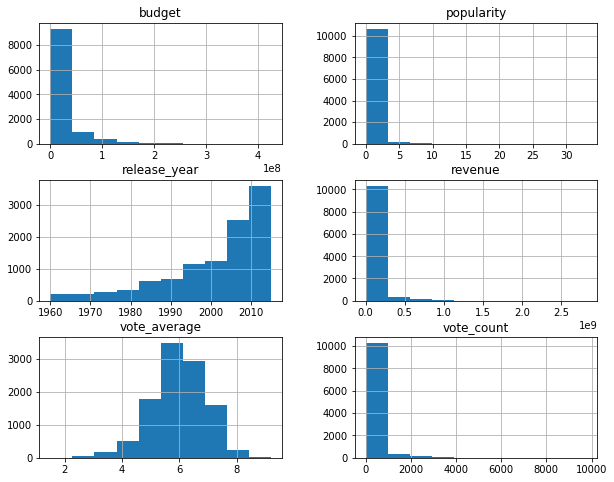

In [16]:
df.hist(figsize=(10, 8));

The above histogram visuals helps to clarify that a significant number of the movie budget and revenue have the value of zero(0).

This data needs to be cleaned up first before progressing with the analysis

#### Cleaning up movie budget and revenue zero (0) values 

In [17]:
#removing rows where movie revenue and budget are equal to zero
df = df[df.budget != 0]
df = df[df.revenue != 0]
            
#quick summary statistics to see the changes
df.describe()            

,popularity,vote_count,vote_average,release_year,budget,revenue
count,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03,3.854000e+03
mean,1.191554,527.720291,6.168163,2001.261028,4.423999e+07,1.370647e+08
std,1.475162,879.956821,0.794920,11.282575,4.480925e+07,2.161114e+08
min,0.001117,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,204.000000,6.200000,2004.000000,3.001611e+07,6.173068e+07
75%,1.368324,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


 Cleaning other columns with missing values

In [18]:
#view other columns with missing values
df.isnull().sum()

id                0
popularity        0
original_title    0
cast              4
director          1
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget            0
revenue           0
dtype: int64

There are 2 columns with missing data (cast and director)

In [19]:
#removing nan values from director and cast column

df = df[df["cast"].isnull() == False]
df = df[df["director"].isnull() == False]

In [20]:
#Re-check for missing values
df.isnull().sum()

id                0
popularity        0
original_title    0
cast              0
director          0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
budget            0
revenue           0
dtype: int64

In [21]:
#view datatypes before proceeding with the analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 12 columns):
id                3849 non-null object
popularity        3849 non-null float64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
genres            3849 non-null object
release_date      3849 non-null datetime64[ns]
vote_count        3849 non-null int64
vote_average      3849 non-null float64
release_year      3849 non-null int64
budget            3849 non-null float64
revenue           3849 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 390.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> The data is ready to move on to exploration, Compute statistics and create visualizations with the goal of addressing the research questions that posed in the Introduction section.


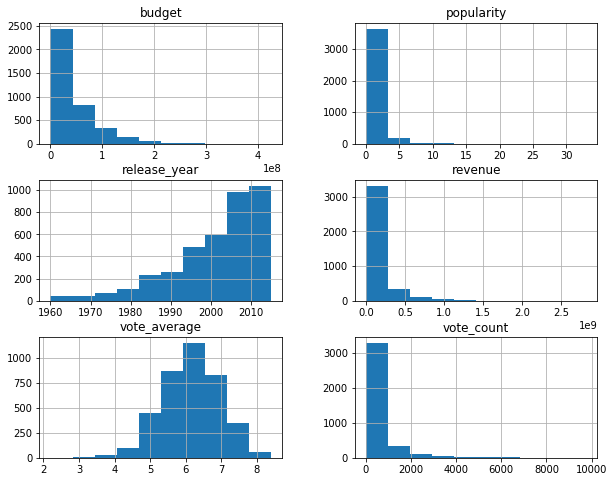

In [22]:
#Fresh histogram visualisation of the dataset
df.hist(figsize=(10, 8));

#### Calculating correlation coefficients between movie revenue and movie budget, popularity, vote_count

The correlation coefficient is a statistical measure of the strength of the relationship between the relative movements of two variables. The values range between -1.0 and 1.0. A calculated number greater than 1.0 or less than -1.0 means that there was an error in the correlation measurement. A correlation of -1.0 shows a perfect negative correlation, while a correlation of 1.0 shows a perfect positive correlation. A correlation of 0.0 shows no linear relationship between the movement of the two variables.

In [23]:
# Define the function to calculate the correlation coefficient
def corr (column1, column2):
    r = (((column1 - column1.mean())/column1.std())*((column2 - column2.mean())/column2.std())).mean()
    return r

In [24]:
# correlation coefficient between movie revenue and budget
corr(df.revenue,df.budget)

0.57003911380640149

In [25]:
# correlation coefficient between movie revenue and popularity
corr(df.revenue,df.popularity)

0.54657403631097778

In [26]:
# correlation coefficient between movie revenue and vote_count
corr(df.revenue,df.vote_count)

0.65436421396613886

### Research Question 1 ( What kind of properties are associated with movies that have high revenues?)

In [27]:
top = df.query('revenue > revenue.mean()')
top.describe()

,popularity,vote_count,vote_average,release_year,budget,revenue
count,1120.000000,1120.000000,1120.000000,1120.000000,1.120000e+03,1.120000e+03
mean,2.129715,1195.613393,6.431875,1999.778571,8.222410e+07,3.673382e+08
std,2.210622,1293.406735,0.718921,12.434676,5.510256e+07,2.872929e+08
min,0.131526,13.000000,4.100000,1960.000000,2.248029e+02,1.375112e+08
25%,1.011166,332.000000,5.900000,1994.000000,3.914732e+07,1.860528e+08
50%,1.580763,725.500000,6.400000,2003.000000,7.270485e+07,2.680396e+08
75%,2.521477,1592.750000,7.000000,2010.000000,1.139663e+08,4.371547e+08
max,32.985763,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


#### From the table above, we can draw some basic statistics from movies associated with high revenues:

> 1. Dataset ranges from year 1960 to 2015 (56 years)
> 2. On an average, movies revenue USD 51,364,360
> 3. on an average, movie budget is USD 58,304,090
> 4. Maximum vote count gotten by a movie associated with high revenue is 9769.
> 5. From the above table, 50% of the movies were released in year 2002


### Research Question 2  (Which of these variables is most correlated with Revenue)

#### Visualizing the data

 Data visualization using the matplolib and seaborn library. I’ll make a pairplot of the columns and see which columns are the most correlated to Revenue.

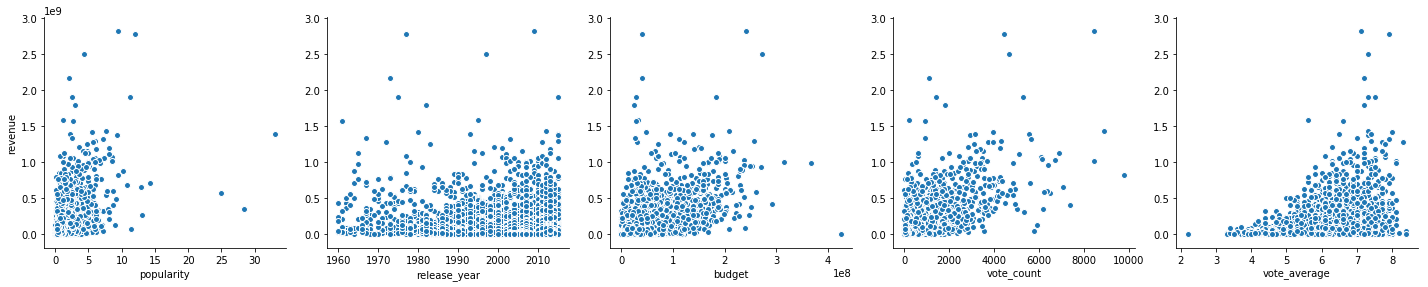

In [28]:
#Using pairplot to visualize the data for correlation

sns.pairplot(df, x_vars=['popularity','release_year','budget','vote_count','vote_average' ], 
             y_vars='revenue', size=4, aspect=1, kind='scatter')
plt.show()

#### A seaborn heatmap will help to visualize the correlation better.

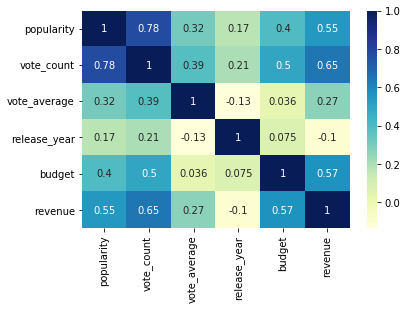

In [29]:
# Visualizing the data using heatmap

sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

From the graphs above , The popularity column seems most correlated to Revenue

### Research Question 3: Top 10 most profitable movies based on revenue?

In [30]:
# top 10 movies based on revenue generated
top10_revenue = df.sort_values('revenue', ascending=False)[0:10][['original_title', 'director','genres','vote_average','release_year','budget','revenue']]
top10_revenue

,original_title,director,genres,vote_average,release_year,budget,revenue
1386,Avatar,James Cameron,Action|Adventure|Fantasy|Science Fiction,7.1,2009,2.408869e+08,2.827124e+09
1329,Star Wars,George Lucas,Adventure|Action|Science Fiction,7.9,1977,3.957559e+07,2.789712e+09
5231,Titanic,James Cameron,Drama|Romance|Thriller,7.3,1997,2.716921e+08,2.506406e+09
10594,The Exorcist,William Friedkin,Drama|Horror|Thriller,7.2,1973,3.928928e+07,2.167325e+09
9806,Jaws,Steven Spielberg,Horror|Thriller|Adventure,7.3,1975,2.836275e+07,1.907006e+09
3,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
8889,E.T. the Extra-Terrestrial,Steven Spielberg,Science Fiction|Adventure|Family|Fantasy,7.2,1982,2.372625e+07,1.791694e+09
8094,The Net,Irwin Winkler,Crime|Drama|Mystery|Thriller|Action,5.6,1995,3.148127e+07,1.583050e+09
10110,One Hundred and One Dalmatians,Clyde Geronimi|Hamilton Luske|Wolfgang Reitherman,Adventure|Animation|Comedy|Family,6.6,1961,2.917944e+07,1.574815e+09
4361,The Avengers,Joss Whedon,Science Fiction|Action|Adventure,7.3,2012,2.089437e+08,1.443191e+09


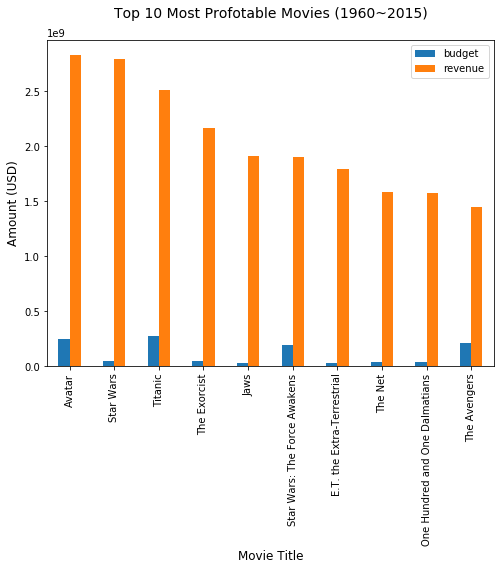

In [31]:
# Top 10 highest movies according to revenue
top10_revenue.index = top10_revenue.original_title

# Visualization of results
top10_revenue[['budget','revenue']].plot(kind="bar", figsize=(8,6))

plt.title('Top 10 Most Profotable Movies (1960~2015)\n', fontsize=14)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Amount (USD)', fontsize=12);


From the visualisation above, The movie 'Avatar' ranked number out of a list of most profitable movies over a 56 year period.

### Research Questions 4: Top 10 most expensive movies?

In [32]:
# top 10 movies based on movie budget
top10_budget = df.sort_values('budget', ascending=False)[0:10][['original_title', 'director','genres','vote_average','release_year','budget','revenue']]
top10_budget

,original_title,director,genres,vote_average,release_year,budget,revenue
2244,The Warrior's Way,Sngmoo Lee,Adventure|Fantasy|Action|Western|Thriller,6.4,2010,4.250000e+08,1.108757e+07
3375,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,Adventure|Action|Fantasy,6.3,2011,3.683713e+08,9.904175e+08
7387,Pirates of the Caribbean: At World's End,Gore Verbinski,Adventure|Fantasy|Action,6.8,2007,3.155006e+08,1.010654e+09
6570,Superman Returns,Bryan Singer,Adventure|Fantasy|Action|Science Fiction,5.3,2006,2.920507e+08,4.230205e+08
5231,Titanic,James Cameron,Drama|Romance|Thriller,7.3,1997,2.716921e+08,2.506406e+09
7394,Spider-Man 3,Sam Raimi,Fantasy|Action|Adventure,5.8,2007,2.713305e+08,9.369017e+08
1929,Tangled,Nathan Greno|Byron Howard,Animation|Family,7.3,2010,2.600000e+08,5.917949e+08
14,Avengers: Age of Ultron,Joss Whedon,Action|Adventure|Science Fiction,7.4,2015,2.575999e+08,1.292632e+09
1389,Harry Potter and the Half-Blood Prince,David Yates,Adventure|Fantasy|Family,7.3,2009,2.541001e+08,9.492765e+08
8089,Waterworld,Kevin Reynolds,Adventure|Action,5.8,1995,2.504192e+08,3.780875e+08


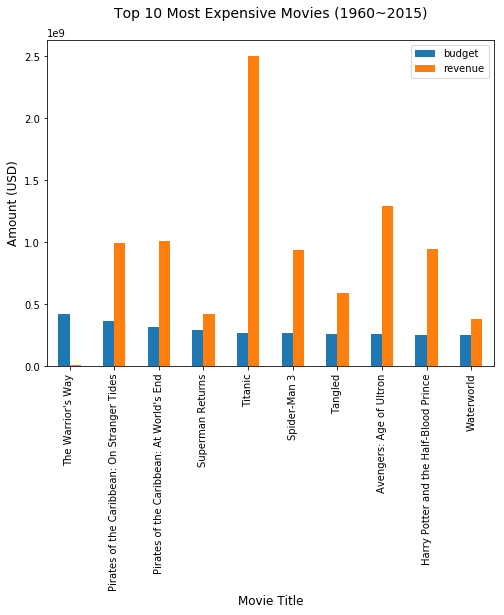

In [33]:
# Top 10 most expensive movies according to budget
top10_budget.index = top10_budget.original_title

# Visualization of results
top10_budget[['budget','revenue']].plot(kind="bar", figsize=(8,6))

plt.title('Top 10 Most Expensive Movies (1960~2015)\n', fontsize=14)
plt.xlabel('Movie Title', fontsize=12)
plt.ylabel('Amount (USD)', fontsize=12);

From the observation above, 'The warrior's way', director by SngMoo Lee is the movie with most budget in this dataset


### Research Question 5: Top 10 most rated movies?

In [34]:
#top 10 most rated IMDB movies
top10_vote = df.sort_values('vote_average', ascending=False)[0:10][['original_title', 'director','genres','vote_count','vote_average','release_year','budget','revenue']]
top10_vote

,original_title,director,genres,vote_count,vote_average,release_year,budget,revenue
7948,Stop Making Sense,Jonathan Demme,Documentary|Music,23,8.4,1984,2.518850e+06,1.045097e+07
4178,The Shawshank Redemption,Frank Darabont,Drama|Crime,5754,8.4,1994,3.677779e+07,4.169346e+07
7269,The Godfather,Francis Ford Coppola,Drama|Crime,3970,8.3,1972,3.128737e+07,1.277914e+09
650,Whiplash,Damien Chazelle,Drama|Music,2372,8.2,2014,3.039600e+06,1.288891e+07
2875,The Dark Knight,Christopher Nolan,Drama|Action|Crime|Thriller,8432,8.1,2008,1.873655e+08,1.014733e+09
10222,Schindler's List,Steven Spielberg,Drama|History|War,2632,8.1,1993,3.320834e+07,4.849410e+08
9758,The Godfather: Part II,Francis Ford Coppola,Drama|Crime,2131,8.1,1974,5.748969e+07,2.102479e+08
4177,Pulp Fiction,Quentin Tarantino,Thriller|Crime,5343,8.1,1994,1.176889e+07,3.147131e+08
4179,Forrest Gump,Robert Zemeckis,Comedy|Drama|Romance,4856,8.1,1994,8.091114e+07,9.973333e+08
2409,Fight Club,David Fincher,Drama,5923,8.1,1999,8.247033e+07,1.320229e+08


The table above shows values under the vote_average columns that are less than 100.

Those rows have have insufficient values and would be filtered out for the analysis. Filter for only values equal or greater than 100 

In [35]:
# Only keep values of vote_average greater than 100
df_vote = df.query('vote_count >= 100')

# Re score sort, and filter the top ten movies
df_vote.sort_values('vote_average', ascending=False)[0:10][['original_title', 'director','genres','vote_count','vote_average','release_year','budget','revenue']]

,original_title,director,genres,vote_count,vote_average,release_year,budget,revenue
4178,The Shawshank Redemption,Frank Darabont,Drama|Crime,5754,8.4,1994,3.677779e+07,4.169346e+07
7269,The Godfather,Francis Ford Coppola,Drama|Crime,3970,8.3,1972,3.128737e+07,1.277914e+09
650,Whiplash,Damien Chazelle,Drama|Music,2372,8.2,2014,3.039600e+06,1.288891e+07
2875,The Dark Knight,Christopher Nolan,Drama|Action|Crime|Thriller,8432,8.1,2008,1.873655e+08,1.014733e+09
4177,Pulp Fiction,Quentin Tarantino,Thriller|Crime,5343,8.1,1994,1.176889e+07,3.147131e+08
4179,Forrest Gump,Robert Zemeckis,Comedy|Drama|Romance,4856,8.1,1994,8.091114e+07,9.973333e+08
9758,The Godfather: Part II,Francis Ford Coppola,Drama|Crime,2131,8.1,1974,5.748969e+07,2.102479e+08
2409,Fight Club,David Fincher,Drama,5923,8.1,1999,8.247033e+07,1.320229e+08
10222,Schindler's List,Steven Spielberg,Drama|History|War,2632,8.1,1993,3.320834e+07,4.849410e+08
35,Room,Lenny Abrahamson,Drama|Thriller,1520,8.0,2015,5.519998e+06,3.256960e+07


 With regards to revenue, 'ShawShank Redemption movie is the most rated movie over a 56 year period.

### Research Question 6: Top 5 Most Popular IMDB Movies

In [36]:
# Top 5 Popular
top5_popularity = df.sort_values('popularity', ascending=False)[0:5][['original_title', 'popularity', 'director','genres','vote_count','vote_average','release_year','budget','revenue']]
top5_popularity

,original_title,popularity,director,genres,vote_count,vote_average,release_year,budget,revenue
0,Jurassic World,32.985763,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,Mad Max: Fury Road,28.419936,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
629,Interstellar,24.949134,Christopher Nolan,Adventure|Drama|Science Fiction,6498,8.0,2014,1.519800e+08,5.726906e+08
630,Guardians of the Galaxy,14.311205,James Gunn,Action|Science Fiction|Adventure,5612,7.9,2014,1.565855e+08,7.122911e+08
2,Insurgent,13.112507,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08


Jurasssic World is the most popular movie, followed by Mad Max: Fury Road, Interstellar, Guardians of the galaxy, and Insurgent respectively.

<a id='conclusions'></a>
## Conclusions

> 1. Observation showed that 50% of the movies with high revenue were released in the year 2002.
> 2. The movie 'Avatar' ranked number out of a list of most profitable movies over a 56 year period.
> 3. 'The warrior's way', director by SngMoo Lee is the movie with most budget in this dataset
> 4. With regards to revenue, 'ShawShank Redemption movie is the most rated movie over a 56 year period.
> 5. Jurasssic World is the most popular movie, followed by Mad Max: Fury Road, Interstellar, Guardians of the galaxy, and Insurgent respectively.

## Limitation

This analysis have certain limitations. 

> 1.Movie budget and revenue had more than half of the values amounting to zero (0) and a lot of data was lost trying to clean for analysis, This may cause results to vary.

> 2. The analysis only used a few descriptive statistics and visualization.
>    There was no use of predictive statistical or machine learning, so inferences drawn may need further improvement

### Sources

https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4

https://www.imdb.com/title/tt2714900/

https://www.imdb.com/title/tt0145937/

https://www.imdb.com/title/tt2247692/

https://www.imdb.com/title/tt0914809/

https://m.imdb.com/title/tt0095895/fullcredits/cast

https://en.wikipedia.org/wiki/Kismat_Konnection

https://www.investopedia.com/terms/c/correlationcoefficient.asp

2020 datascience & machine learning bootcamp

In [37]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0